In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Encontrar el codo
from kneed import KneeLocator
from scipy.sparse import hstack

from ipywidgets import interact, widgets

In [2]:
#TODO:
#+TEMATICA: accion... AÑADIR CAMPO
#Tratar el texto del titulo: para ver tematicas comunes
#ELIMINAR LOS NULOS al haber convertido a numerico
#ELIMINAR VARIABLES DE ID

In [3]:
movies = pd.read_csv("moviesv2.dat", sep="\t", engine="python", header=0, encoding="ISO-8859-1",
                     names=["MovieID", "Title", "imdbID", "spanishTitle", "imdbPictureURL", "year",
                            "rtID", "rtAllCriticsRating", "rtAllCriticsNumReviews", "rtAllCriticsNumFresh",
                            "rtAllCriticsNumRotten", "rtAllCriticsScore", "rtTopCriticsRating", "rtTopCriticsNumReviews",
                            "rtTopCriticsNumFresh", "rtTopCriticsNumRotten", "rtTopCriticsScore", "rtAudienceRating",
                            "rtAudienceNumRatings", "rtAudienceScore", "rtPictureURL"])

In [4]:
movies.shape

(10197, 21)

In [5]:
movies

,MovieID,Title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,...,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28,13,...,46,5.8,5,2,3,40,3.2,44587,61,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36,24,...,66,7,6,5,1,83,3.2,10489,66,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25,14,...,56,5.5,11,5,6,45,3.3,5666,79,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19,9,...,47,5.4,5,1,4,20,3,13761,64,http://content8.flixster.com/movie/25/54/25542...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10192,65088,Bedtime Stories,960731,Más allá de los sueños,http://ia.media-imdb.com/images/M/MV5BMjA5Njk5...,2008,bedtime_stories,4.4,104,26,...,25,4.7,26,6,20,23,3.5,108877,63,http://content6.flixster.com/movie/10/94/33/10...
10193,65091,Manhattan Melodrama,25464,El enemigo público número 1,http://ia.media-imdb.com/images/M/MV5BMTUyODE3...,1934,manhattan_melodrama,7,12,10,...,83,0,4,2,2,50,3.7,344,71,http://content9.flixster.com/movie/66/44/64/66...
10194,65126,Choke,1024715,Choke,http://ia.media-imdb.com/images/M/MV5BMTMxMDI4...,2008,choke,5.6,135,73,...,54,4.9,26,8,18,30,3.3,13893,55,http://content6.flixster.com/movie/10/85/09/10...
10195,65130,Revolutionary Road,959337,Revolutionary Road,http://ia.media-imdb.com/images/M/MV5BMTI2MzY2...,2008,revolutionary_road,6.7,194,133,...,68,6.9,36,25,11,69,3.5,46044,70,http://content8.flixster.com/movie/10/88/40/10...


In [6]:
# Veamos las primeras filas para asegurarnos de que se haya cargado correctamente
movies.head()

,MovieID,Title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,...,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28,13,...,46,5.8,5,2,3,40,3.2,44587,61,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36,24,...,66,7,6,5,1,83,3.2,10489,66,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25,14,...,56,5.5,11,5,6,45,3.3,5666,79,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19,9,...,47,5.4,5,1,4,20,3,13761,64,http://content8.flixster.com/movie/25/54/25542...


In [7]:
movies.columns

Index(['MovieID', 'Title', 'imdbID', 'spanishTitle', 'imdbPictureURL', 'year',
       'rtID', 'rtAllCriticsRating', 'rtAllCriticsNumReviews',
       'rtAllCriticsNumFresh', 'rtAllCriticsNumRotten', 'rtAllCriticsScore',
       'rtTopCriticsRating', 'rtTopCriticsNumReviews', 'rtTopCriticsNumFresh',
       'rtTopCriticsNumRotten', 'rtTopCriticsScore', 'rtAudienceRating',
       'rtAudienceNumRatings', 'rtAudienceScore', 'rtPictureURL'],
      dtype='object')

In [8]:
# Ver información general
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10197 entries, 0 to 10196
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   MovieID                 10197 non-null  int64 
 1   Title                   10197 non-null  object
 2   imdbID                  10197 non-null  int64 
 3   spanishTitle            10197 non-null  object
 4   imdbPictureURL          10016 non-null  object
 5   year                    10197 non-null  int64 
 6   rtID                    9886 non-null   object
 7   rtAllCriticsRating      10197 non-null  object
 8   rtAllCriticsNumReviews  10197 non-null  object
 9   rtAllCriticsNumFresh    10197 non-null  object
 10  rtAllCriticsNumRotten   10197 non-null  object
 11  rtAllCriticsScore       10197 non-null  object
 12  rtTopCriticsRating      10197 non-null  object
 13  rtTopCriticsNumReviews  10197 non-null  object
 14  rtTopCriticsNumFresh    10197 non-null  object
 15  rt

In [9]:
# Descripción estadística
movies.describe()

,MovieID,imdbID,year
count,10197.000000,1.019700e+04,10197.000000
mean,12852.741002,2.021885e+05,1988.251643
std,17431.004896,2.071287e+05,18.688734
min,1.000000,4.390000e+02,1903.000000
25%,2780.000000,8.220000e+04,1981.000000
50%,5421.000000,1.130570e+05,1995.000000
75%,8664.000000,2.817240e+05,2002.000000
max,65133.000000,1.349938e+06,2011.000000


In [10]:
movies.describe(include='object')

,Title,spanishTitle,imdbPictureURL,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
count,10197,10197,10016,9886,10197,10197,10197,10197,10197,10197,10197,10197,10197,10197,10197,10197,10197,10197
unique,9406,9357,9221,9134,86,244,205,150,101,82,49,44,39,98,34,5087,89,9152
top,Hamlet,Hamlet,http://ia.media-imdb.com/images/M/MV5BMTM5NjMz...,1075422-hamlet,0,0,0,0,0,0,0,0,0,0,0,0,0,\N
freq,6,6,6,6,1526,655,1050,1555,1053,5305,2461,3530,3951,3530,2622,2622,2625,230


**Miramos duplicados**

In [11]:
movies.rtID.value_counts()

rtID
1075422-hamlet             6
phantom_of_the_opera       5
august_rush                4
beach                      4
punisher_war_zone          4
                          ..
lonely_are_the_brave       1
1107426-ace_in_the_hole    1
serpico                    1
prince_of_the_city         1
blackadder-back-forth      1
Name: count, Length: 9134, dtype: int64

In [12]:
movies[movies.rtID == '1075422-hamlet']

,MovieID,Title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
1284,1411,Hamlet,116477,Hamlet,http://ia.media-imdb.com/images/M/MV5BMTM5NjMz...,1996,1075422-hamlet,8.2,54,51,...,94,7.2,14,11,3,78,3.8,5816,86,http://content7.flixster.com/movie/10/94/26/10...
1735,1941,Hamlet,116477,Hamlet,http://ia.media-imdb.com/images/M/MV5BMTM5NjMz...,1996,1075422-hamlet,8.2,54,51,...,94,7.2,14,11,3,78,3.8,5816,86,http://content7.flixster.com/movie/10/94/26/10...
2589,2820,Hamlet,116477,Hamlet,http://ia.media-imdb.com/images/M/MV5BMTM5NjMz...,1996,1075422-hamlet,8.2,54,51,...,94,7.2,14,11,3,78,3.8,5816,86,http://content7.flixster.com/movie/10/94/26/10...
3319,3598,Hamlet,116477,Hamlet,http://ia.media-imdb.com/images/M/MV5BMTM5NjMz...,1996,1075422-hamlet,8.2,54,51,...,94,7.2,14,11,3,78,3.8,5816,86,http://content7.flixster.com/movie/10/94/26/10...
3441,3723,Hamlet,116477,Hamlet,http://ia.media-imdb.com/images/M/MV5BMTM5NjMz...,1996,1075422-hamlet,8.2,54,51,...,94,7.2,14,11,3,78,3.8,5816,86,http://content7.flixster.com/movie/10/94/26/10...
9986,61246,Hamlet,116477,Hamlet,http://ia.media-imdb.com/images/M/MV5BMTM5NjMz...,1996,1075422-hamlet,8.2,54,51,...,94,7.2,14,11,3,78,3.8,5816,86,http://content7.flixster.com/movie/10/94/26/10...


Vemos filas repetidas, vamos a eliminar las muestras repetidas. La columna que identifica de manera unica las peliculas es la de MovieID y la de imdbID

In [13]:
# Contar el número total de duplicados únicos basados en la columna 'MovieID'
movieid_duplicates = movies.duplicated(subset=['MovieID']).sum()

print(f"Total de duplicados: {movieid_duplicates}")

Total de duplicados: 0


In [14]:
# Contar el número total de duplicados únicos basados en la columna 'imdbID'
num_duplicates = movies.duplicated(subset=['imdbID']).sum()

print(f"Total de duplicados: {num_duplicates}")

Total de duplicados: 774


Vemos que el campo 'MovieID' cambia por peliculas con el mismo 'imdbID', vamos a eliminar los duplicados segun la columna imdbID

In [15]:
movies.shape

(10197, 21)

In [16]:
# Especificar las columnas para la eliminación de duplicados
columns_to_check = ['imdbID']

# Eliminar filas duplicadas
df_no_duplicates = movies.drop_duplicates(subset=columns_to_check)

print("\nDataFrame después de eliminar filas duplicadas:")
print(df_no_duplicates)


DataFrame después de eliminar filas duplicadas:
       MovieID                        Title   imdbID  \
0            1                    Toy story   114709   
1            2                      Jumanji   113497   
2            3               Grumpy Old Men   107050   
3            4            Waiting to Exhale   114885   
4            5  Father of the Bride Part II   113041   
...        ...                          ...      ...   
10191    65037                        Ben X   953318   
10192    65088              Bedtime Stories   960731   
10193    65091          Manhattan Melodrama    25464   
10194    65126                        Choke  1024715   
10196    65133      Blackadder Back & Forth   212579   

                                            spanishTitle  \
0                                   Toy story (juguetes)   
1                                                Jumanji   
2                                    Dos viejos gruñones   
3                                   Es

In [17]:
df_no_duplicates.shape

(9423, 21)

In [18]:
df_no_duplicates.rtID.value_counts()

rtID
toy_story                         1
1003361-cabinet_of_dr_caligari    1
wargames                          1
mr_hobbs_takes_a_vacation         1
ordet                             1
                                 ..
my_chauffeur                      1
horror-express                    1
hook                              1
devil_girl_from_mars              1
blackadder-back-forth             1
Name: count, Length: 9126, dtype: int64

**Miramos nulos**

In [19]:
df_no_duplicates.isnull().sum()

MovieID                     0
Title                       0
imdbID                      0
spanishTitle                0
imdbPictureURL            176
year                        0
rtID                      297
rtAllCriticsRating          0
rtAllCriticsNumReviews      0
rtAllCriticsNumFresh        0
rtAllCriticsNumRotten       0
rtAllCriticsScore           0
rtTopCriticsRating          0
rtTopCriticsNumReviews      0
rtTopCriticsNumFresh        0
rtTopCriticsNumRotten       0
rtTopCriticsScore           0
rtAudienceRating            0
rtAudienceNumRatings        0
rtAudienceScore             0
rtPictureURL                0
dtype: int64

Sólo hay nulos en las columnas imdbPictureURL, y rtID

- Columna imdbPictureURL

Como es una columna que muestra la imagen de la pelicula y no nos sirve para el clustering la podemos eliminar

In [20]:
# Eliminar la columna 'imdbPictureURL'
df_no_duplicates = df_no_duplicates.drop(columns=['imdbPictureURL'])

- Columna rtID

Eliminamos la columna rtID ya que no nos aporta información para el clustering

In [21]:
df_no_duplicates.rtID.value_counts()

rtID
toy_story                         1
1003361-cabinet_of_dr_caligari    1
wargames                          1
mr_hobbs_takes_a_vacation         1
ordet                             1
                                 ..
my_chauffeur                      1
horror-express                    1
hook                              1
devil_girl_from_mars              1
blackadder-back-forth             1
Name: count, Length: 9126, dtype: int64

In [22]:
df_no_duplicates = df_no_duplicates.drop(columns=['rtID'])

In [23]:
df_no_duplicates.isnull().sum()

MovieID                   0
Title                     0
imdbID                    0
spanishTitle              0
year                      0
rtAllCriticsRating        0
rtAllCriticsNumReviews    0
rtAllCriticsNumFresh      0
rtAllCriticsNumRotten     0
rtAllCriticsScore         0
rtTopCriticsRating        0
rtTopCriticsNumReviews    0
rtTopCriticsNumFresh      0
rtTopCriticsNumRotten     0
rtTopCriticsScore         0
rtAudienceRating          0
rtAudienceNumRatings      0
rtAudienceScore           0
rtPictureURL              0
dtype: int64

In [24]:
movies = df_no_duplicates

In [25]:
movies.isnull().sum()

MovieID                   0
Title                     0
imdbID                    0
spanishTitle              0
year                      0
rtAllCriticsRating        0
rtAllCriticsNumReviews    0
rtAllCriticsNumFresh      0
rtAllCriticsNumRotten     0
rtAllCriticsScore         0
rtTopCriticsRating        0
rtTopCriticsNumReviews    0
rtTopCriticsNumFresh      0
rtTopCriticsNumRotten     0
rtTopCriticsScore         0
rtAudienceRating          0
rtAudienceNumRatings      0
rtAudienceScore           0
rtPictureURL              0
dtype: int64

Ya tenemos el dataset limpio, ahora vamos a sacar algunas visualizaciones

### Análisis exploratorio

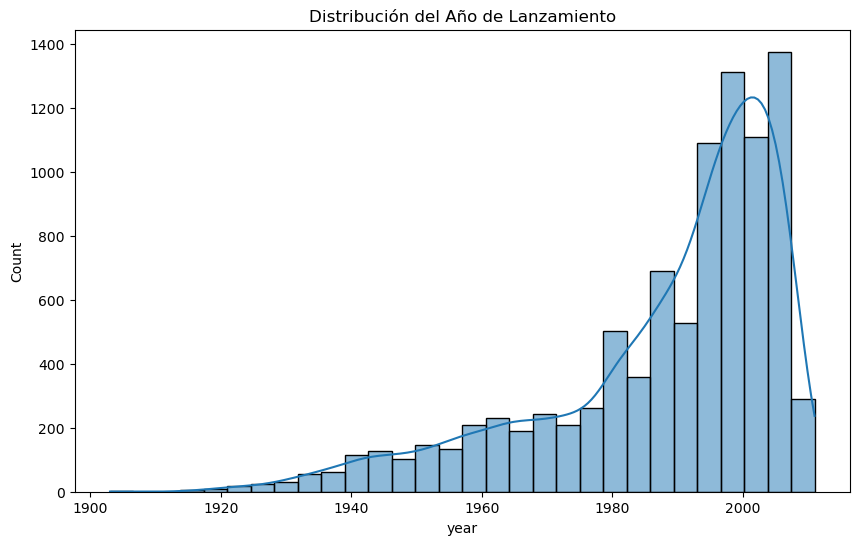

In [26]:
# Visualizar la distribución de algunas variables
plt.figure(figsize=(10, 6))
sns.histplot(movies['year'], bins=30, kde=True)
plt.title('Distribución del Año de Lanzamiento')
plt.show()

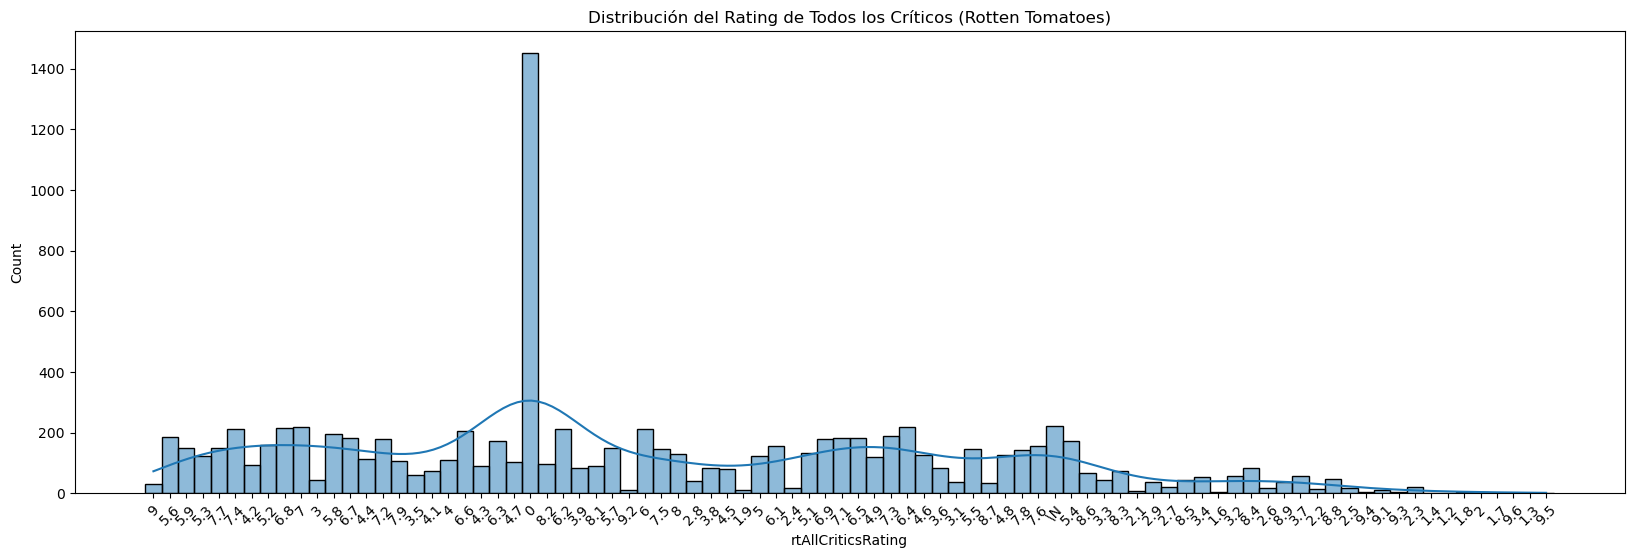

In [27]:
# Distribución del rating de todos los críticos (Rotten Tomatoes) con ajustes en el eje X
plt.figure(figsize=(20, 6))
sns.histplot(movies['rtAllCriticsRating'], bins=30, kde=True)
plt.title('Distribución del Rating de Todos los Críticos (Rotten Tomatoes)')
plt.xticks(rotation=45)  # Inclinar las etiquetas del eje X 45 grados
plt.show()

Vamos a convertir las variables de tipo rating o score a numericas. Las que tengan valores de \N lo convierte a null

In [28]:
movies.dtypes

MovieID                    int64
Title                     object
imdbID                     int64
spanishTitle              object
year                       int64
rtAllCriticsRating        object
rtAllCriticsNumReviews    object
rtAllCriticsNumFresh      object
rtAllCriticsNumRotten     object
rtAllCriticsScore         object
rtTopCriticsRating        object
rtTopCriticsNumReviews    object
rtTopCriticsNumFresh      object
rtTopCriticsNumRotten     object
rtTopCriticsScore         object
rtAudienceRating          object
rtAudienceNumRatings      object
rtAudienceScore           object
rtPictureURL              object
dtype: object

In [29]:
print(movies['rtAllCriticsRating'].dtype)

object


In [30]:
movies['rtAllCriticsRating'] = pd.to_numeric(movies['rtAllCriticsRating'], errors='coerce')

In [31]:
print(movies['rtAllCriticsRating'].dtype)

float64


In [32]:
print(movies['rtAllCriticsRating'].head())

0    9.0
1    5.6
2    5.9
3    5.6
4    5.3
Name: rtAllCriticsRating, dtype: float64


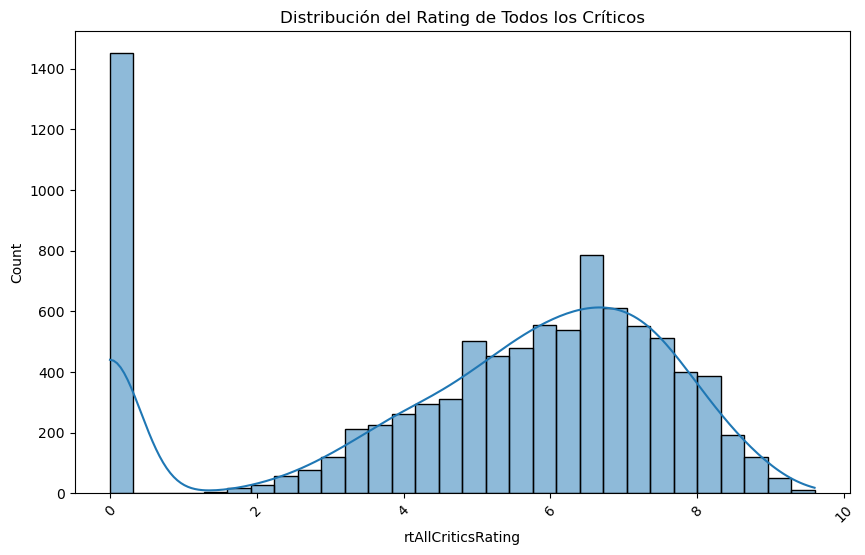

In [33]:
# Distribución del rating de todos los críticos (Rotten Tomatoes) con ajustes en el eje X
plt.figure(figsize=(10, 6))
sns.histplot(movies['rtAllCriticsRating'], bins=30, kde=True)
plt.title('Distribución del Rating de Todos los Críticos')
plt.xticks(rotation=45)  # Inclinar las etiquetas del eje X 45 grados
plt.show()

In [34]:
movies.rtAllCriticsNumReviews.value_counts()

rtAllCriticsNumReviews
0      610
5      278
7      268
6      264
9      249
      ... 
220      1
281      1
242      1
244      1
275      1
Name: count, Length: 244, dtype: int64

In [35]:
movies['rtAllCriticsNumReviews'] = pd.to_numeric(movies['rtAllCriticsNumReviews'], errors='coerce')

In [36]:
movies.dtypes

MovieID                     int64
Title                      object
imdbID                      int64
spanishTitle               object
year                        int64
rtAllCriticsRating        float64
rtAllCriticsNumReviews    float64
rtAllCriticsNumFresh       object
rtAllCriticsNumRotten      object
rtAllCriticsScore          object
rtTopCriticsRating         object
rtTopCriticsNumReviews     object
rtTopCriticsNumFresh       object
rtTopCriticsNumRotten      object
rtTopCriticsScore          object
rtAudienceRating           object
rtAudienceNumRatings       object
rtAudienceScore            object
rtPictureURL               object
dtype: object

In [37]:
movies['rtAllCriticsNumReviews'] = movies['rtAllCriticsNumReviews'].astype('Int64')

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

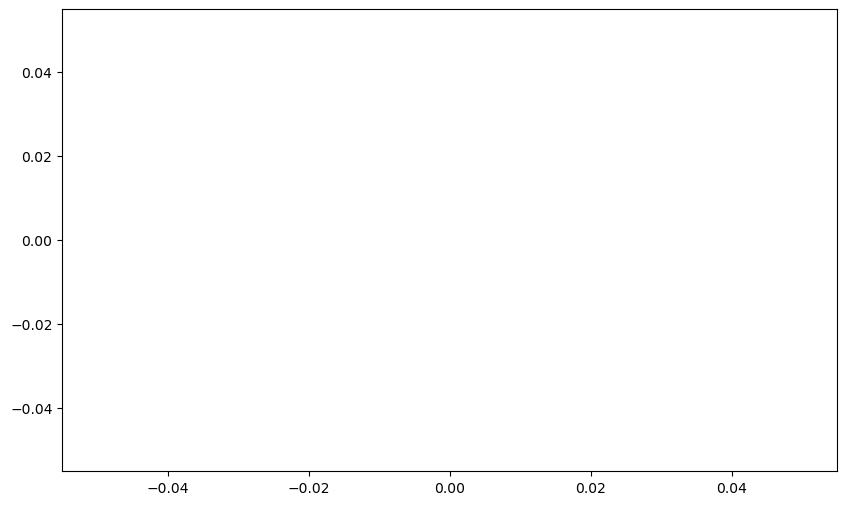

In [38]:
# Distribución del rating de todos los críticos (Rotten Tomatoes) con ajustes en el eje X
plt.figure(figsize=(10, 6))
sns.histplot(movies['rtAllCriticsNumReviews'], bins=30, kde=True)
plt.title('Distribución del Numero de reviews de Todos los Críticos (Rotten Tomatoes)')
plt.xticks(rotation=45)  # Inclinar las etiquetas del eje X 45 grados
plt.show()

In [ ]:
movies.dtypes

In [ ]:
movies.rtAllCriticsNumFresh.value_counts()

In [39]:
movies.rtAllCriticsNumRotten.value_counts()

rtAllCriticsNumRotten
0      1457
1       964
2       769
3       624
4       518
       ... 
162       1
160       1
144       1
139       1
127       1
Name: count, Length: 150, dtype: int64

In [40]:
movies.rtAllCriticsScore.value_counts()

rtAllCriticsScore
0      987
100    847
50     273
\N     220
66     217
      ... 
3       21
5       19
49      16
2        7
1        6
Name: count, Length: 101, dtype: int64

In [41]:
movies.rtTopCriticsRating.value_counts()

rtTopCriticsRating
0      5065
\N      220
5.8     111
6.2     109
5.2     109
       ... 
9.8       1
10        1
9.4       1
9.7       1
1.6       1
Name: count, Length: 82, dtype: int64

In [42]:
movies.rtTopCriticsNumReviews.value_counts()

rtTopCriticsNumReviews
0     2349
1     1001
2      671
3      584
4      460
5      395
6      315
7      242
\N     220
8      177
9      151
11     135
10     131
30     122
12     113
32     112
29     110
31     108
27      99
26      97
34      96
13      96
35      95
28      95
33      94
24      94
25      92
14      90
23      83
22      82
19      81
17      81
21      77
15      75
20      74
37      72
36      71
16      71
18      66
38      57
39      54
40      49
41      33
42      21
43      18
44      10
45       2
47       1
48       1
Name: count, dtype: int64

In [43]:
movies.rtTopCriticsNumFresh.value_counts()

rtTopCriticsNumFresh
0     3373
1     1173
2      762
3      550
4      443
5      316
6      274
7      228
\N     220
8      193
9      154
10     144
11     124
13     119
12     105
14      97
16      87
15      86
17      75
23      73
18      73
19      71
20      68
22      68
21      61
25      56
24      53
28      47
26      43
29      41
27      37
30      35
33      27
31      26
35      21
32      21
36      18
38      15
37      14
34      10
39       8
40       7
41       5
42       2
Name: count, dtype: int64

In [44]:
movies.rtTopCriticsNumRotten.value_counts()

rtTopCriticsNumRotten
0     3747
1     1475
2      760
3      527
4      343
5      254
\N     220
6      203
7      179
8      145
9      140
11     115
12     109
10     105
14     101
13      97
15      93
16      91
18      78
19      70
17      69
22      67
20      67
21      65
23      51
26      44
24      43
25      41
27      28
28      25
29      18
30      15
32      13
31       9
34       5
33       4
36       3
35       3
38       1
Name: count, dtype: int64

In [45]:
movies.rtTopCriticsScore.value_counts()

rtTopCriticsScore
0      3373
100    1398
50      490
66      259
\N      220
       ... 
24       12
74       11
39       10
79        8
2         3
Name: count, Length: 98, dtype: int64

In [46]:
movies.rtAudienceRating.value_counts()

rtAudienceRating
0      2504
3.4     524
3.3     516
3.6     514
3.2     511
3.5     510
3.1     471
3.7     456
3       451
3.8     382
3.9     381
2.9     355
4       303
2.8     288
4.1     225
\N      220
2.7     194
2.6     148
4.2     134
2.5      92
4.3      83
2.4      44
4.4      40
2.3      26
2.2      17
2.1      11
4.5      11
2         4
4.6       3
1.8       1
1.6       1
1.5       1
5         1
1.9       1
Name: count, dtype: int64

In [47]:
movies.rtAudienceNumRatings.value_counts()

rtAudienceNumRatings
0        2504
\N        220
289         8
281         7
162         6
         ... 
12785       1
3676        1
1706        1
1299        1
13893       1
Name: count, Length: 5080, dtype: int64

In [48]:
movies.rtAudienceScore.value_counts()

rtAudienceScore
0     2507
\N     220
73     155
79     144
70     144
      ... 
14       2
17       2
98       2
11       1
15       1
Name: count, Length: 89, dtype: int64

In [49]:
movies['rtAllCriticsNumFresh'] = pd.to_numeric(movies['rtAllCriticsNumFresh'], errors='coerce')
movies['rtAllCriticsNumFresh'] = movies['rtAllCriticsNumFresh'].astype('Int64')

movies['rtAllCriticsNumRotten'] = pd.to_numeric(movies['rtAllCriticsNumRotten'], errors='coerce')
movies['rtAllCriticsNumRotten'] = movies['rtAllCriticsNumRotten'].astype('Int64')

movies['rtAllCriticsScore'] = pd.to_numeric(movies['rtAllCriticsScore'], errors='coerce')
movies['rtAllCriticsScore'] = movies['rtAllCriticsScore'].astype('Int64')

movies['rtTopCriticsRating'] = pd.to_numeric(movies['rtTopCriticsRating'], errors='coerce')

movies['rtTopCriticsNumReviews'] = pd.to_numeric(movies['rtTopCriticsNumReviews'], errors='coerce')
movies['rtTopCriticsNumReviews'] = movies['rtTopCriticsNumReviews'].astype('Int64')

movies['rtTopCriticsNumFresh'] = pd.to_numeric(movies['rtTopCriticsNumFresh'], errors='coerce')
movies['rtTopCriticsNumFresh'] = movies['rtTopCriticsNumFresh'].astype('Int64')

movies['rtTopCriticsNumRotten'] = pd.to_numeric(movies['rtTopCriticsNumRotten'], errors='coerce')
movies['rtTopCriticsNumRotten'] = movies['rtTopCriticsNumRotten'].astype('Int64')

movies['rtTopCriticsScore'] = pd.to_numeric(movies['rtTopCriticsScore'], errors='coerce')
movies['rtTopCriticsScore'] = movies['rtTopCriticsScore'].astype('Int64')

movies['rtAudienceRating'] = pd.to_numeric(movies['rtAudienceRating'], errors='coerce')

movies['rtAudienceNumRatings'] = pd.to_numeric(movies['rtAudienceNumRatings'], errors='coerce')
movies['rtAudienceNumRatings'] = movies['rtAudienceNumRatings'].astype('Int64')

movies['rtAudienceScore'] = pd.to_numeric(movies['rtAudienceScore'], errors='coerce')
movies['rtAudienceScore'] = movies['rtAudienceScore'].astype('Int64')


In [50]:
print(movies[["rtAllCriticsRating", "rtAllCriticsNumReviews", "rtAllCriticsNumFresh",
                            "rtAllCriticsNumRotten", "rtAllCriticsScore", "rtTopCriticsRating", "rtTopCriticsNumReviews",
                            "rtTopCriticsNumFresh", "rtTopCriticsNumRotten", "rtTopCriticsScore", "rtAudienceRating",
                            "rtAudienceNumRatings", "rtAudienceScore"]].head())

   rtAllCriticsRating  rtAllCriticsNumReviews  rtAllCriticsNumFresh  \
0                 9.0                      73                    73   
1                 5.6                      28                    13   
2                 5.9                      36                    24   
3                 5.6                      25                    14   
4                 5.3                      19                     9   

   rtAllCriticsNumRotten  rtAllCriticsScore  rtTopCriticsRating  \
0                      0                100                 8.5   
1                     15                 46                 5.8   
2                     12                 66                 7.0   
3                     11                 56                 5.5   
4                     10                 47                 5.4   

   rtTopCriticsNumReviews  rtTopCriticsNumFresh  rtTopCriticsNumRotten  \
0                      17                    17                      0   
1                     

In [51]:
movies.isna().sum() #movies.isnull().sum()

MovieID                     0
Title                       0
imdbID                      0
spanishTitle                0
year                        0
rtAllCriticsRating        220
rtAllCriticsNumReviews    220
rtAllCriticsNumFresh      220
rtAllCriticsNumRotten     220
rtAllCriticsScore         220
rtTopCriticsRating        220
rtTopCriticsNumReviews    220
rtTopCriticsNumFresh      220
rtTopCriticsNumRotten     220
rtTopCriticsScore         220
rtAudienceRating          220
rtAudienceNumRatings      220
rtAudienceScore           220
rtPictureURL                0
dtype: int64

Eliminamos las filas que tengan nulos

In [52]:
movies.shape

(9423, 19)

In [53]:
#Eliminamos nulos
df_no_na = movies.dropna()

In [54]:
df_no_na.isna().sum()

MovieID                   0
Title                     0
imdbID                    0
spanishTitle              0
year                      0
rtAllCriticsRating        0
rtAllCriticsNumReviews    0
rtAllCriticsNumFresh      0
rtAllCriticsNumRotten     0
rtAllCriticsScore         0
rtTopCriticsRating        0
rtTopCriticsNumReviews    0
rtTopCriticsNumFresh      0
rtTopCriticsNumRotten     0
rtTopCriticsScore         0
rtAudienceRating          0
rtAudienceNumRatings      0
rtAudienceScore           0
rtPictureURL              0
dtype: int64

In [55]:
movies.shape

(9423, 19)

In [56]:
# Función para mostrar gráficos de barras para variables categóricas
def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribución de {column}')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# Función para mostrar histogramas para variables numéricas
def plot_numerical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

In [60]:
movies = df_no_na

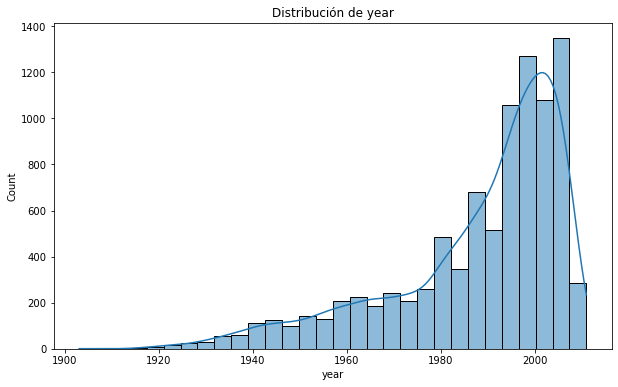

In [61]:
# Distribución del año de lanzamiento
plot_numerical_distribution(movies, 'year')

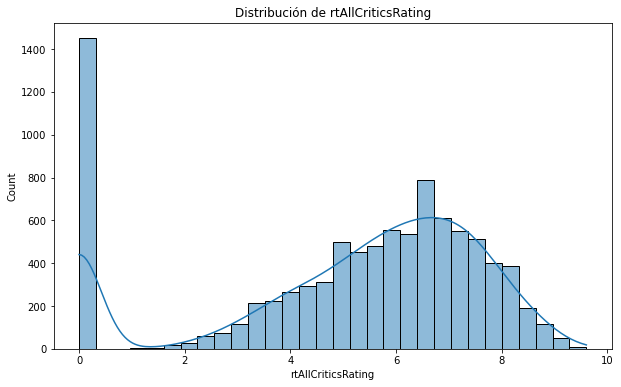

In [62]:
# Distribución del rating de todos los críticos
plot_numerical_distribution(movies, 'rtAllCriticsRating')

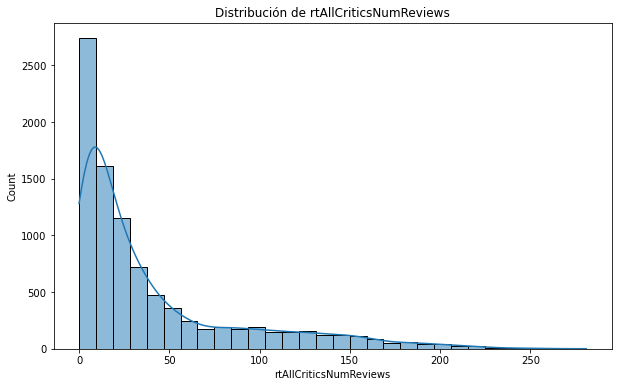

In [63]:
#Distribución del número de reseñas de todos los críticos
plot_numerical_distribution(movies, 'rtAllCriticsNumReviews')

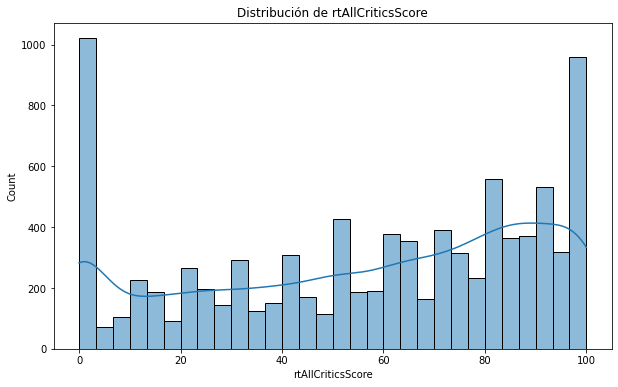

In [64]:
#Distribución del score de todos los críticos
plot_numerical_distribution(movies, 'rtAllCriticsScore')

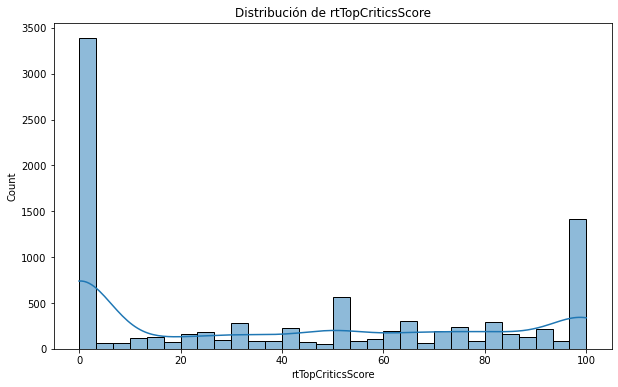

In [65]:
#Distribución del score del top críticos
plot_numerical_distribution(movies, 'rtTopCriticsScore')

Matriz de correlacion

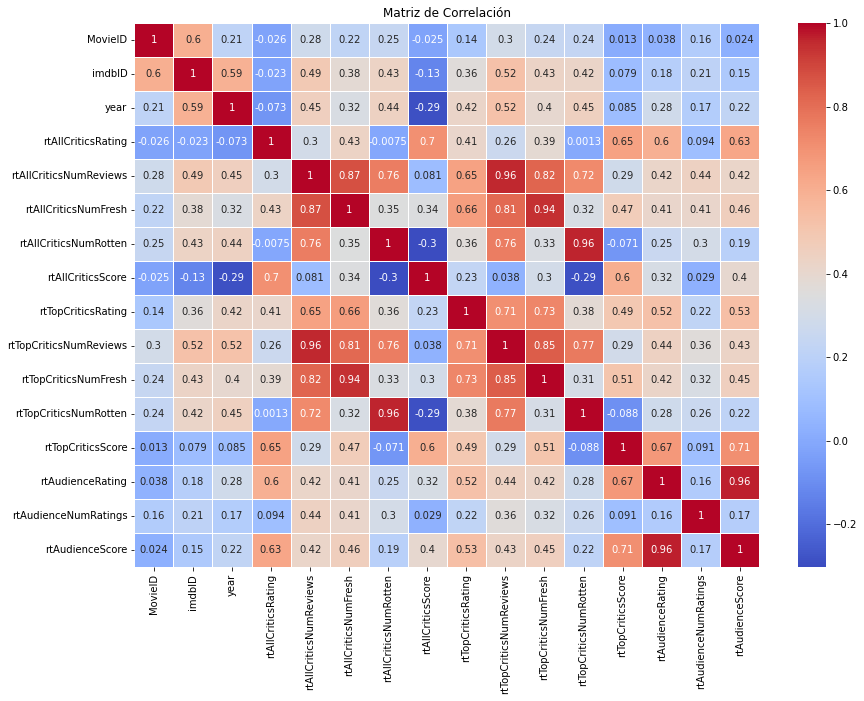

In [66]:
plt.figure(figsize=(14, 10))
corr_matrix = movies.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Vemos que hay fuerte correlación entre:
- La variable rtAudienceScore y rtAudienceRating
- Las variables rtTopCriticsNumReviews, rtAllCriticsNumFresh y rtAllCriticsNumReviews y rtAllCriticsNumRotten
- rtTopCriticsNumFresh y rtAllCriticsNumFresh
- rtTopCriticsNumRotten y rtAllCriticsNumRotten
- rtAllCriticsRating y rtAllCriticsScore
- rtTopCriticsRating y rtTopCriticsScore

Podemos eliminar: rtAudienceScore, rtTopCriticsNumReviews, rtAllCriticsNumFresh, rtTopCriticsNumFresh, rtTopCriticsNumRotten, rtAllCriticsNumReviews, rtAllCriticsScore y rtTopCriticsScore

In [67]:
movies.columns

Index(['MovieID', 'Title', 'imdbID', 'spanishTitle', 'year',
       'rtAllCriticsRating', 'rtAllCriticsNumReviews', 'rtAllCriticsNumFresh',
       'rtAllCriticsNumRotten', 'rtAllCriticsScore', 'rtTopCriticsRating',
       'rtTopCriticsNumReviews', 'rtTopCriticsNumFresh',
       'rtTopCriticsNumRotten', 'rtTopCriticsScore', 'rtAudienceRating',
       'rtAudienceNumRatings', 'rtAudienceScore', 'rtPictureURL'],
      dtype='object')

In [68]:
movies_2 = movies[["MovieID", "Title", "imdbID", "spanishTitle", "year",
                        "rtAllCriticsRating","rtAllCriticsNumRotten", 
                   "rtTopCriticsRating", "rtAudienceRating",
                            "rtAudienceNumRatings", "rtPictureURL"]]

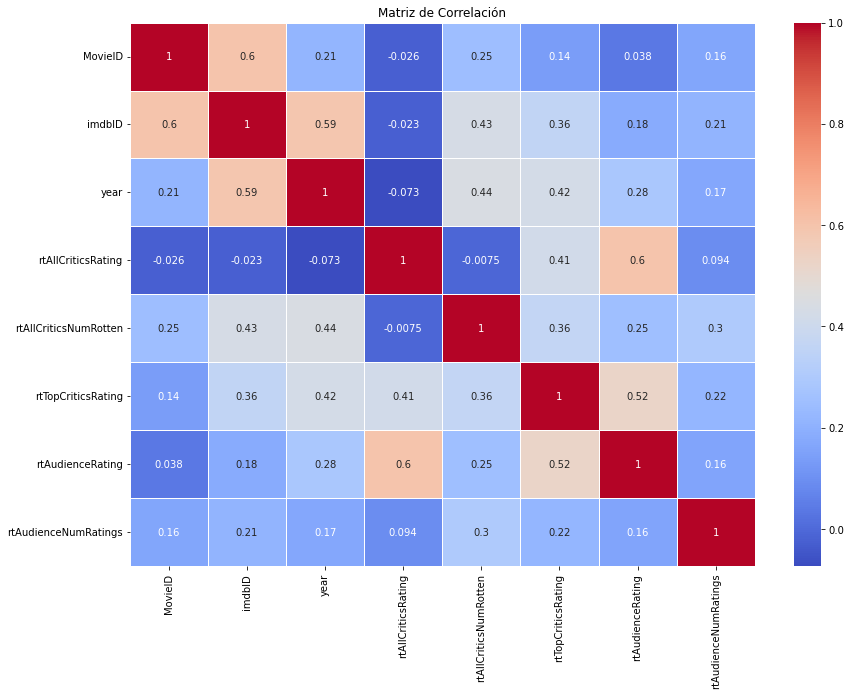

In [69]:
plt.figure(figsize=(14, 10))
corr_matrix = movies_2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [70]:
movies_2.dtypes

MovieID                    int64
Title                     object
imdbID                     int64
spanishTitle              object
year                       int64
rtAllCriticsRating       float64
rtAllCriticsNumRotten      Int64
rtTopCriticsRating       float64
rtAudienceRating         float64
rtAudienceNumRatings       Int64
rtPictureURL              object
dtype: object

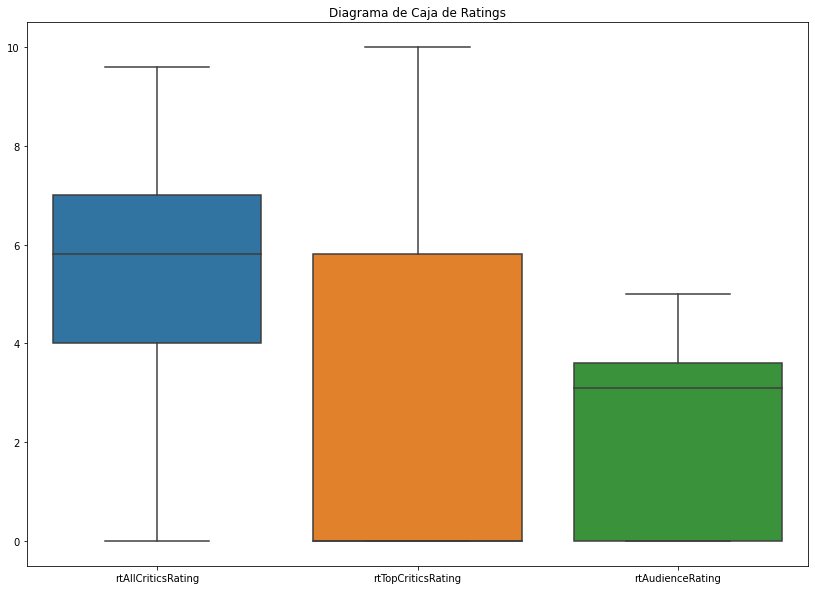

In [71]:
# Diagrama de caja para algunas variables numéricas
plt.figure(figsize=(14, 10))
sns.boxplot(data=movies_2[['rtAllCriticsRating', 'rtTopCriticsRating', 'rtAudienceRating']])
plt.title('Diagrama de Caja de Ratings')
plt.show()

Vemos que en general, los Ratings de los críticos son más elevados que los de la Audiencia

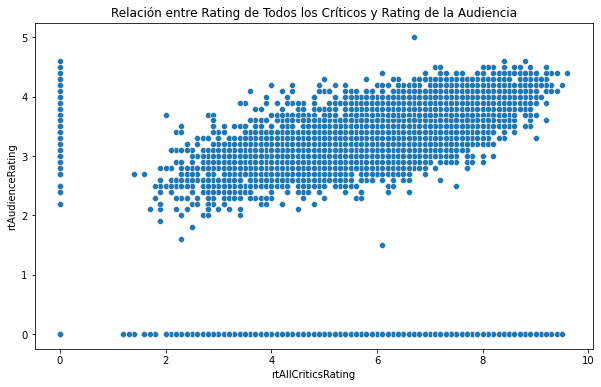

In [72]:
# Relación entre el rating de todos los críticos y el rating de la audiencia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_2, x='rtAllCriticsRating', y='rtAudienceRating')
plt.title('Relación entre Rating de Todos los Críticos y Rating de la Audiencia')
plt.show()


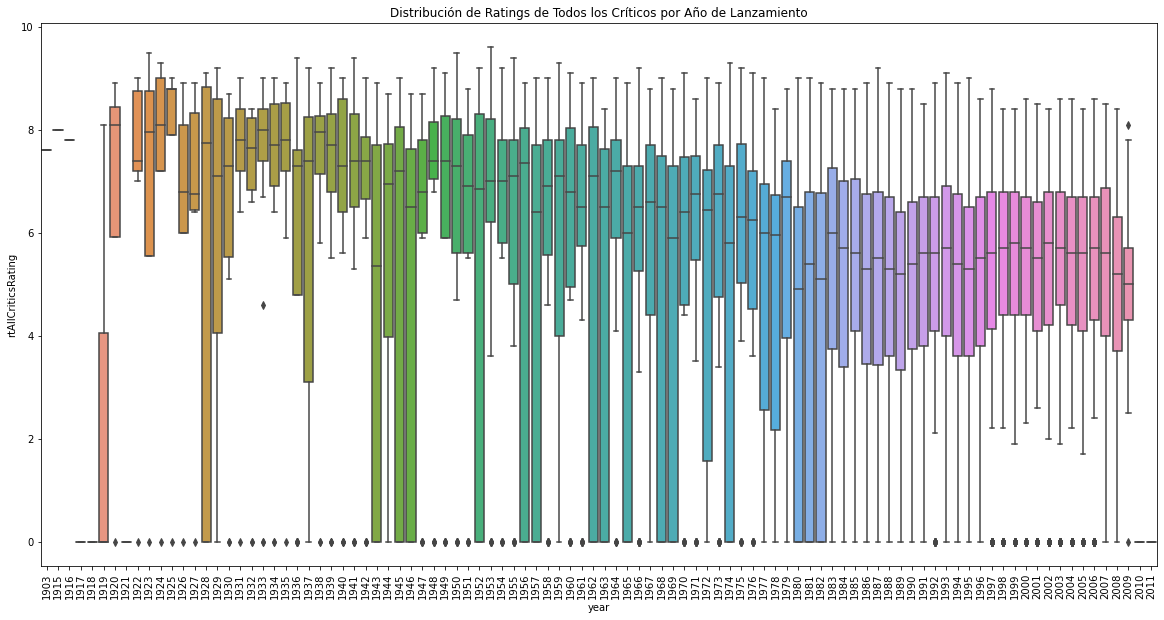

In [73]:
# Distribución de ratings por año de lanzamiento
plt.figure(figsize=(20, 10))
sns.boxplot(data=movies_2, x='year', y='rtAllCriticsRating')
plt.title('Distribución de Ratings de Todos los Críticos por Año de Lanzamiento')
plt.xticks(rotation=90)
plt.show()

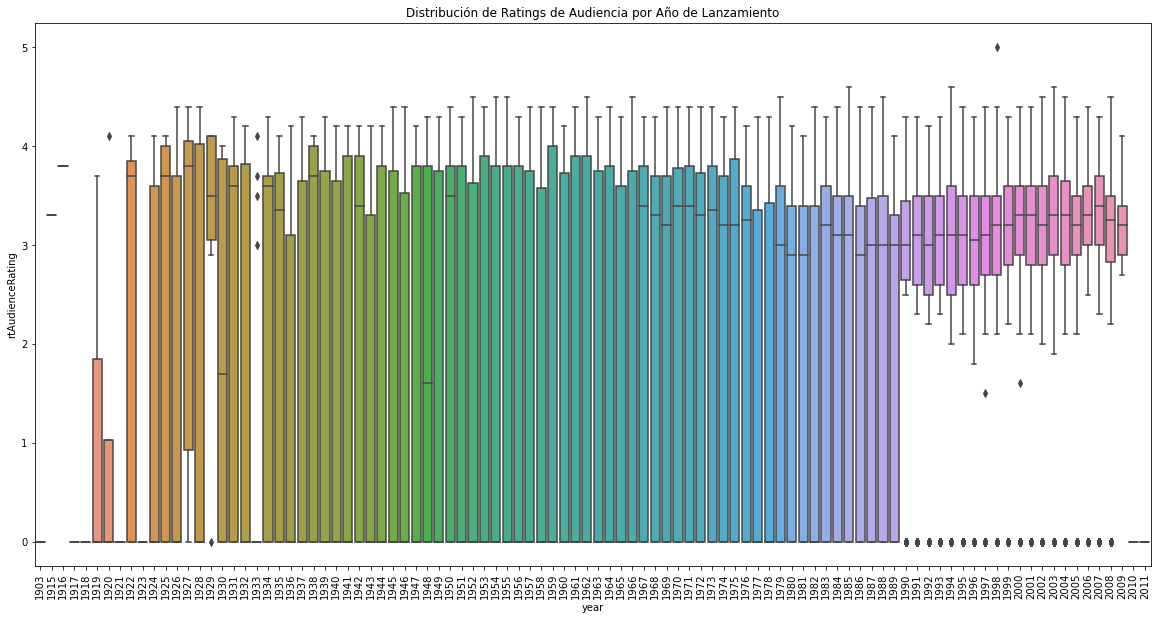

In [74]:
# Distribución de ratings por año de lanzamiento
plt.figure(figsize=(20, 10))
sns.boxplot(data=movies_2, x='year', y='rtAudienceRating')
plt.title('Distribución de Ratings de Audiencia por Año de Lanzamiento')
plt.xticks(rotation=90)
plt.show()

In [75]:
movies_2.dtypes

MovieID                    int64
Title                     object
imdbID                     int64
spanishTitle              object
year                       int64
rtAllCriticsRating       float64
rtAllCriticsNumRotten      Int64
rtTopCriticsRating       float64
rtAudienceRating         float64
rtAudienceNumRatings       Int64
rtPictureURL              object
dtype: object

In [76]:
movies_2.columns

Index(['MovieID', 'Title', 'imdbID', 'spanishTitle', 'year',
       'rtAllCriticsRating', 'rtAllCriticsNumRotten', 'rtTopCriticsRating',
       'rtAudienceRating', 'rtAudienceNumRatings', 'rtPictureURL'],
      dtype='object')

In [77]:
# Seleccionar solo las columnas numéricas relevantes para el clustering
numerical_features = ['MovieID', 'imdbID', 'year',
       'rtAllCriticsRating', 'rtAllCriticsNumRotten', 'rtTopCriticsRating',
       'rtAudienceRating', 'rtAudienceNumRatings']

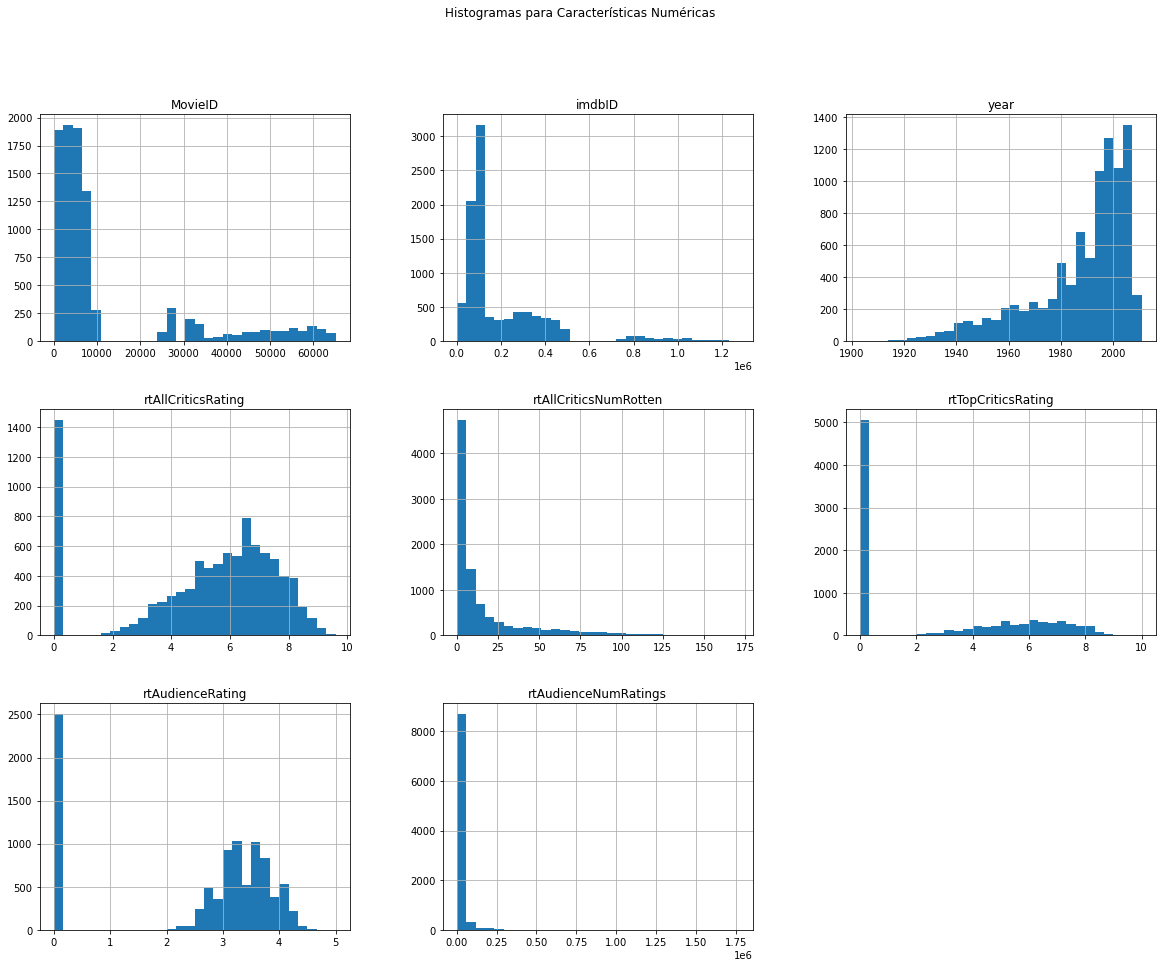

In [78]:
# Histogramas para todas las características numéricas
movies_2[numerical_features].hist(bins=30, figsize=(20, 15))
plt.suptitle('Histogramas para Características Numéricas')
plt.show()

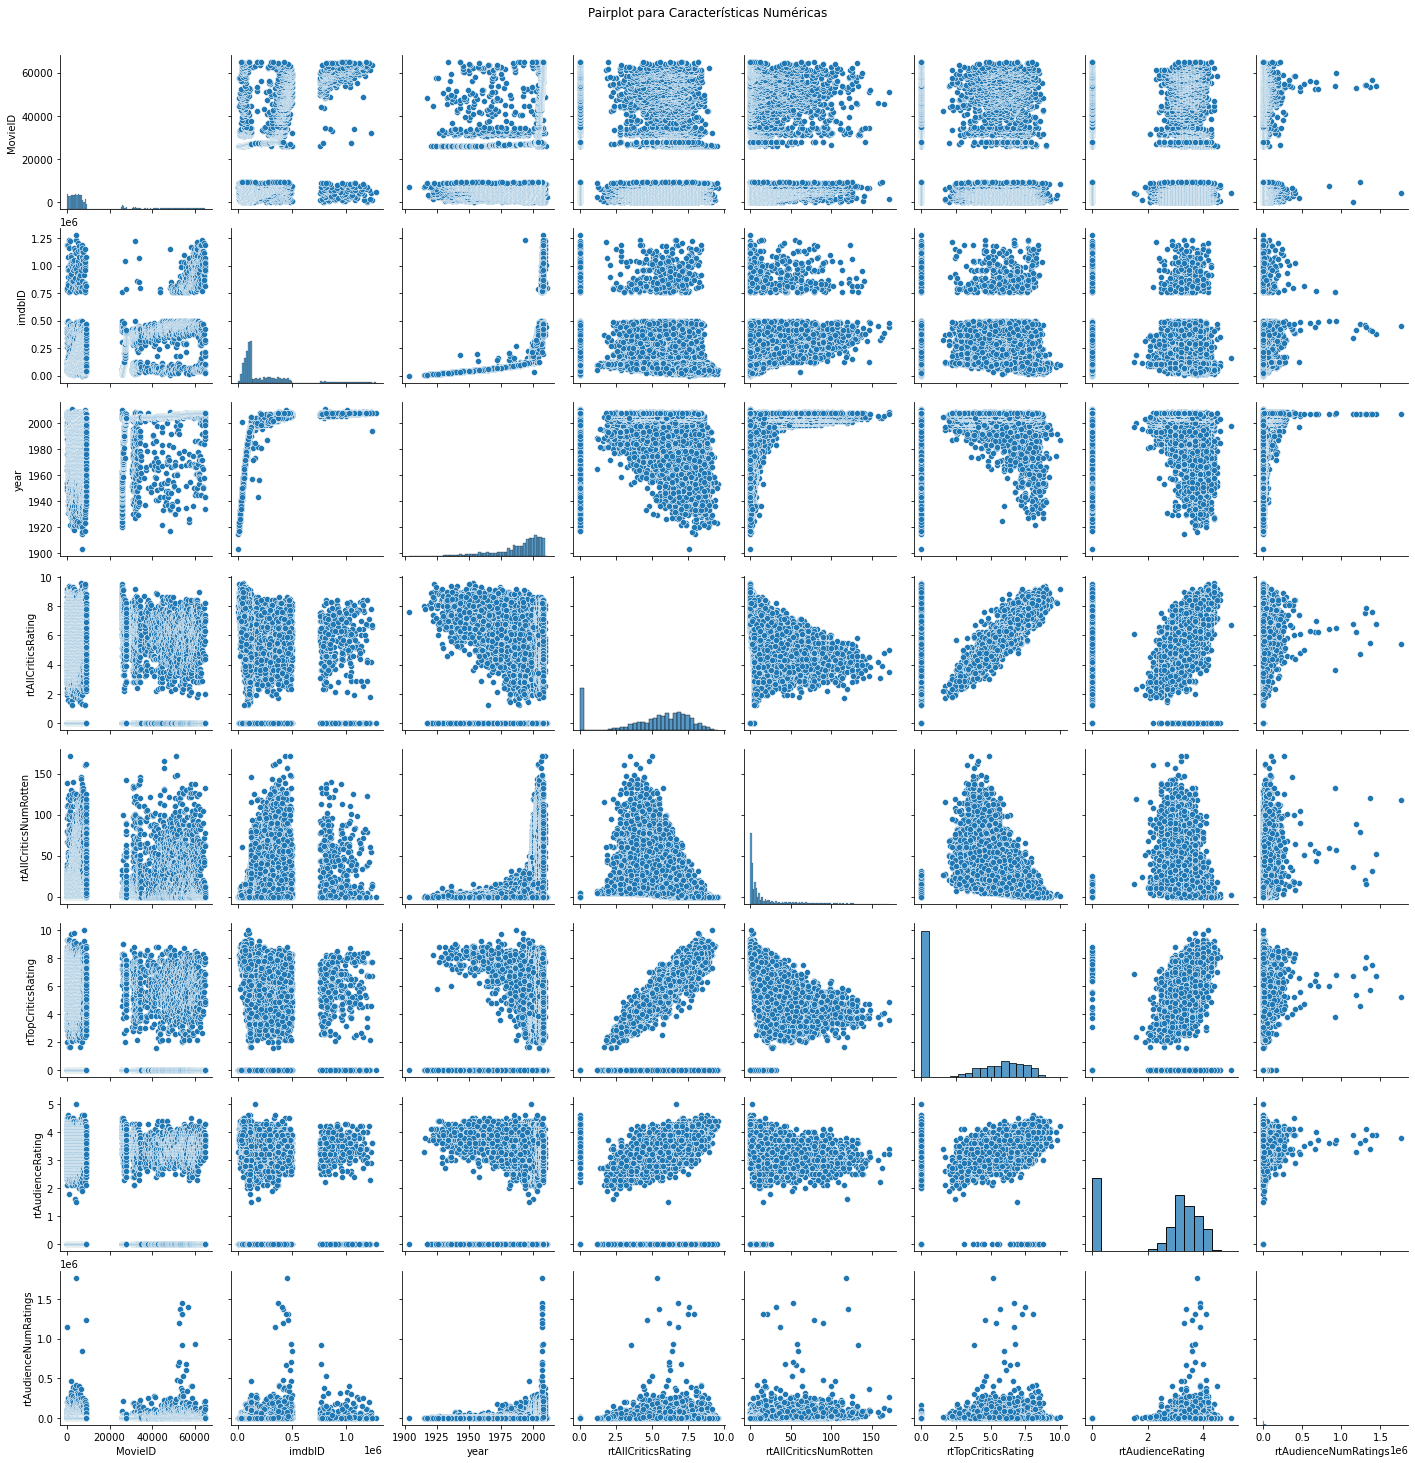

In [79]:
# Pares de gráficos (pairplot) para ver las relaciones entre características numéricas
sns.pairplot(movies_2[numerical_features])
plt.suptitle('Pairplot para Características Numéricas', y=1.02)
plt.show()

# Clustering

### Versión 1

In [134]:
movies_2.dtypes

MovieID                    int64
Title                     object
imdbID                     int64
spanishTitle              object
year                       int64
rtAllCriticsRating       float64
rtAllCriticsNumRotten      Int64
rtTopCriticsRating       float64
rtAudienceRating         float64
rtAudienceNumRatings       Int64
rtPictureURL              object
KMeans_Cluster             int32
Agglomerative_Cluster      int64
DBSCAN_Cluster             int64
Cluster                    int32
dtype: object

In [135]:
movies_2.columns

Index(['MovieID', 'Title', 'imdbID', 'spanishTitle', 'year',
       'rtAllCriticsRating', 'rtAllCriticsNumRotten', 'rtTopCriticsRating',
       'rtAudienceRating', 'rtAudienceNumRatings', 'rtPictureURL',
       'KMeans_Cluster', 'Agglomerative_Cluster', 'DBSCAN_Cluster', 'Cluster'],
      dtype='object')

In [138]:
features = movies_2[['year',
       'rtAllCriticsRating', 'rtAllCriticsNumRotten', 'rtTopCriticsRating',
       'rtAudienceRating', 'rtAudienceNumRatings']]

In [139]:
# Normalizar las características
scaler = StandardScaler()
X = scaler.fit_transform(features)

In [140]:
# Función para calcular el Silhouette Score para KMeans
def silhouette_kmeans(X, max_k):
    silhouette_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        labels = kmeans.labels_
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
    return silhouette_scores

# Función para calcular el Silhouette Score para Agglomerative Clustering
def silhouette_agglomerative(X, max_k):
    silhouette_scores = []
    for k in range(2, max_k+1):
        agglomerative = AgglomerativeClustering(n_clusters=k).fit(X)
        labels = agglomerative.labels_
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
    return silhouette_scores

# Función para calcular el Silhouette Score para DBSCAN
def silhouette_dbscan(X, eps_values, min_samples_values):
    best_score = -1
    best_params = None
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            labels = dbscan.labels_
            # DBSCAN labels outliers as -1, so we filter them out for silhouette score
            if len(set(labels)) > 1:  # Ensure more than one cluster is present
                score = silhouette_score(X[labels != -1], labels[labels != -1])
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)
    return best_score, best_params

In [141]:
# Calcular el Silhouette Score para KMeans
kmeans_scores = silhouette_kmeans(X, max_k=10)
print("KMeans Silhouette Scores:", kmeans_scores)

# Calcular el Silhouette Score para Agglomerative Clustering
agglomerative_scores = silhouette_agglomerative(X, max_k=10)
print("Agglomerative Clustering Silhouette Scores:", agglomerative_scores)

# Calcular el Silhouette Score para DBSCAN
eps_values = np.linspace(0.1, 1.0, 10)
min_samples_values = range(2, 10)
dbscan_score, dbscan_params = silhouette_dbscan(X, eps_values, min_samples_values)
print("DBSCAN Best Silhouette Score:", dbscan_score)
print("DBSCAN Best Parameters (eps, min_samples):", dbscan_params)

KMeans Silhouette Scores: [0.34909376975371803, 0.3639205306618633, 0.38160888115556146, 0.38756301849724994, 0.428525894188129, 0.42581010211130893, 0.4354442380345196, 0.3908646710857028, 0.3928590502434137]
Agglomerative Clustering Silhouette Scores: [0.33273367660752656, 0.3489843896513567, 0.3578495566291402, 0.37315290998236056, 0.3978171278372939, 0.416454468783616, 0.42506754357025006, 0.42147366559424837, 0.42696247451165803]
DBSCAN Best Silhouette Score: 0.4482232481892996
DBSCAN Best Parameters (eps, min_samples): (0.1, 9)


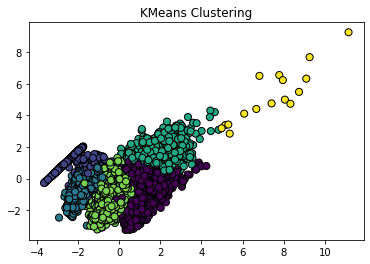

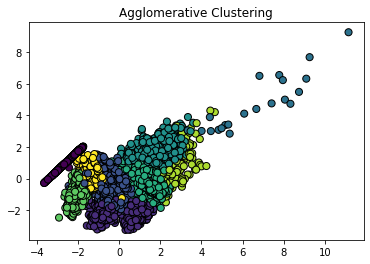

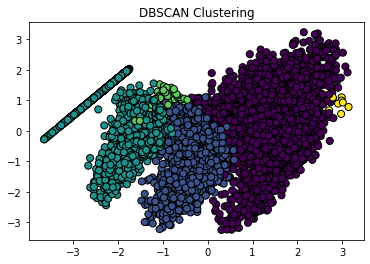

In [142]:
# Reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizar KMeans
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("KMeans Clustering")
plt.show()

# Visualizar Agglomerative Clustering
#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("Agglomerative Clustering")
plt.show()

# Visualizar DBSCAN (excluyendo ruido)
plt.scatter(X_pca[dbscan_labels != -1, 0], X_pca[dbscan_labels != -1, 1], c=dbscan_labels[dbscan_labels != -1], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("DBSCAN Clustering")
plt.show()


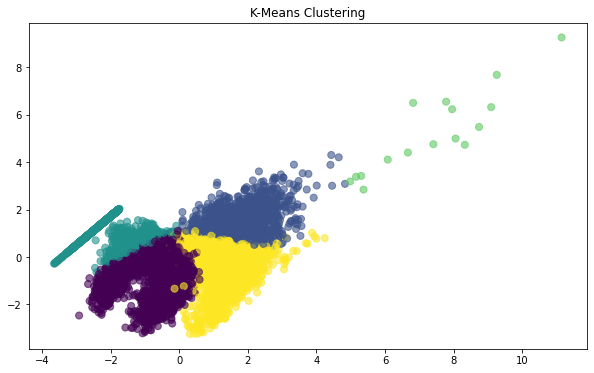

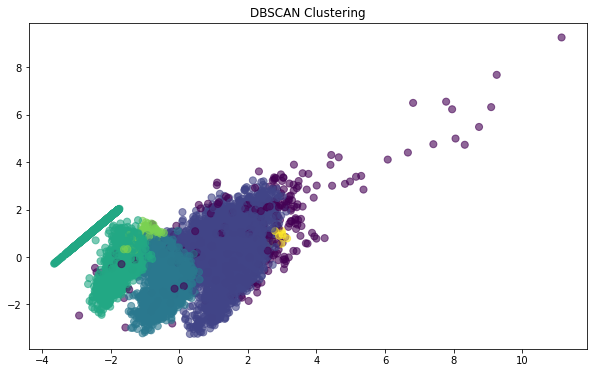

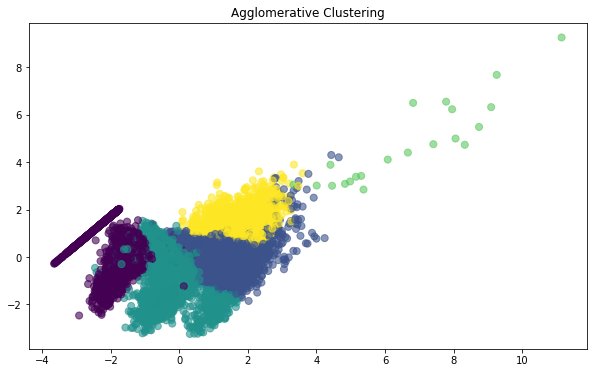

In [150]:
# K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)
plot_clusters(pca_features, kmeans_labels, 'K-Means Clustering')
#movies_2['KMeans_Cluster'] = kmeans_labels


# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_features)
plot_clusters(pca_features, dbscan_labels, 'DBSCAN Clustering')
#movies_2['DBSCAN_Cluster'] = dbscan_labels


# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(scaled_features)
plot_clusters(pca_features, agg_labels, 'Agglomerative Clustering')
#movies_2['Agglomerative_Cluster'] = agg_labels

### Evaluación de los modelos:

1. Evaluación Interna: Métricas de Cohesión y Separación
- Silhouette Score: Mide cómo de similares son los objetos dentro del mismo cluster (cohesión) en comparación con otros clusters (separación). Un valor cercano a 1 indica que los clusters están bien definidos.
- Calinski-Harabasz Index: También conocido como el criterio de varianza, evalúa la relación entre la suma de las distancias dentro de los clusters y la suma de las distancias entre los clusters. Un valor más alto indica clusters mejor definidos.
2. Evaluación Externa: Comparación con Clusters Verdaderos (si están disponibles)
- Si tuvieramos los datos etiquetados, podríamos usar métricas como el Adjusted Rand Index (ARI) o el Normalized Mutual Information (NMI) para comparar la coincidencia entre los clusters previstos y los verdaderos etiquetados.
3. Evaluación Visual
- La visualización de los clusters puede proporcionar una comprensión intuitiva de la calidad del clustering.


Como en nuestro caso no tenemos etiquetas usaremos la evaluación interna


In [152]:
# Calcular Silhouette Score
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
dbscan_silhouette = silhouette_score(scaled_features, dbscan_labels)
agg_silhouette = silhouette_score(scaled_features, agg_labels)

print(f'Silhouette Score - K-Means: {kmeans_silhouette}')
print(f'Silhouette Score - DBSCAN: {dbscan_silhouette}')
print(f'Silhouette Score - Agglomerative Clustering: {agg_silhouette}')

# Calcular Calinski-Harabasz Index
kmeans_ch = calinski_harabasz_score(scaled_features, kmeans_labels)
dbscan_ch = calinski_harabasz_score(scaled_features, dbscan_labels)
agg_ch = calinski_harabasz_score(scaled_features, agg_labels)

print("-----------------------------------------------")
print(f'Calinski-Harabasz Index - K-Means: {kmeans_ch}')
print(f'Calinski-Harabasz Index - DBSCAN: {dbscan_ch}')
print(f'Calinski-Harabasz Index - Agglomerative Clustering: {agg_ch}')

# Calcular Davies-Bouldin Index
kmeans_db = davies_bouldin_score(scaled_features, kmeans_labels)
dbscan_db = davies_bouldin_score(scaled_features, dbscan_labels)
agg_db = davies_bouldin_score(scaled_features, agg_labels)

print("-----------------------------------------------")
print(f'Davies-Bouldin Index - K-Means: {kmeans_db}')
print(f'Davies-Bouldin Index - DBSCAN: {dbscan_db}')
print(f'Davies-Bouldin Index - Agglomerative Clustering: {agg_db}')

Silhouette Score - K-Means: 0.38756301849724994
Silhouette Score - DBSCAN: 0.2869940088809597
Silhouette Score - Agglomerative Clustering: 0.37315290998236056
-----------------------------------------------
Calinski-Harabasz Index - K-Means: 4360.387554621976
Calinski-Harabasz Index - DBSCAN: 1884.100022827485
Calinski-Harabasz Index - Agglomerative Clustering: 3871.0644597470005
-----------------------------------------------
Davies-Bouldin Index - K-Means: 0.870575393607633
Davies-Bouldin Index - DBSCAN: 2.2875255460613704
Davies-Bouldin Index - Agglomerative Clustering: 0.9369017792833342


### Interpretación de las Métricas:

- Silhouette Score: Un valor más alto indica mejores clusters. Los valores cercanos a 1 son ideales, valores cercanos a 0 indican clusters solapados, y valores negativos indican una mala asignación. El modelo con el valor más alto es el de K-Means

- Calinski-Harabasz Index: Un valor más alto es mejor, indicando clusters más definidos, y por eso un modelo de mejor rendimiento. El modelo con el valor más alto es el de K-Means

- Davies-Bouldin Index: Un valor más bajo indica mejores clusters, indica una mejor separación entre los clusters. El modelo con el valor más bajo es el de K-Means

Modelo ganador: KMeans

## Versión 2 Clustering mejorado

In [103]:
features = movies_2[['year',
       'rtAllCriticsRating', 'rtAllCriticsNumRotten', 'rtTopCriticsRating',
       'rtAudienceRating', 'rtAudienceNumRatings']]

In [104]:
movies_2.dtypes

MovieID                    int64
Title                     object
imdbID                     int64
spanishTitle              object
year                       int64
rtAllCriticsRating       float64
rtAllCriticsNumRotten      Int64
rtTopCriticsRating       float64
rtAudienceRating         float64
rtAudienceNumRatings       Int64
rtPictureURL              object
KMeans_Cluster             int32
Agglomerative_Cluster      int64
DBSCAN_Cluster             int64
dtype: object

In [105]:
numerical_features = ['year',
       'rtAllCriticsRating', 'rtAllCriticsNumRotten', 'rtTopCriticsRating',
       'rtAudienceRating', 'rtAudienceNumRatings']

In [108]:
# Estandarizar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(movies_2[numerical_features])

### Añadimos columna de Texto: spanishTitle

Vamos a añadir la columna de Texto: titulo de la película

In [117]:
movies_2.dtypes

MovieID                    int64
Title                     object
imdbID                     int64
spanishTitle              object
year                       int64
rtAllCriticsRating       float64
rtAllCriticsNumRotten      Int64
rtTopCriticsRating       float64
rtAudienceRating         float64
rtAudienceNumRatings       Int64
rtPictureURL              object
KMeans_Cluster             int32
Agglomerative_Cluster      int64
DBSCAN_Cluster             int64
dtype: object

In [118]:
movies_2.Title.value_counts()

Ningen no jôken            3
The Hurricane              2
Scrooge                    2
The Chase                  2
More                       2
                          ..
Midnight Express           1
Max Dugan Returns          1
Madame Sousatzka           1
Roadside Prophets          1
Blackadder Back & Forth    1
Name: Title, Length: 9187, dtype: int64

In [119]:
movies_2.spanishTitle.value_counts()

El cuervo                  3
En el punto de mira        3
El regreso                 3
Innocence                  2
Despedida de soltero       2
                          ..
No hay salida              1
Un mundo implacable        1
Solaris                    1
Mi vida sin mí             1
Blackadder Back & Forth    1
Name: spanishTitle, Length: 9141, dtype: int64

In [120]:
# Estandarizar los datos
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(movies_2[numerical_features])

In [121]:
# Convertir el texto (título de la película) en vectores TF-IDF
tfidf_vectorizer = TfidfVectorizer()
title_tfidf = tfidf_vectorizer.fit_transform(movies_2['spanishTitle'])

# Concatenar características numéricas y características de texto
X_combined = hstack((scaled_features, title_tfidf))

# Determinar número óptimo de clústers

Para determinar el número óptimo de clusters en un conjunto de datos, se pueden utilizar varios métodos. Dos de los más comunes son:
- Método del codo (Elbow Method)
- Método de la silueta (Silhouette Method). 

Estos métodos se aplican principalmente al algoritmo K-Means, pero se puede usar el mismo enfoque para otros algoritmos de clustering con pequeñas modificaciones.

1. Método del Codo (Elbow Method)
El método del codo busca el número de clusters que minimiza la suma de las distancias cuadradas dentro de cada cluster (inertia).

2. Método de la Silueta (Silhouette Method)
El método de la silueta mide la coherencia dentro de los clusters y compara la distancia media intra-cluster con la distancia media del cluster más cercano. Los valores de silueta cercanos a 1 indican que los puntos están bien agrupados.

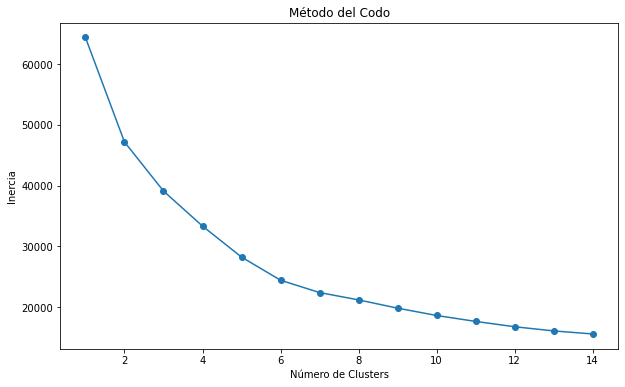

In [122]:
# Método del Codo
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_combined)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

In [123]:
kneedle = KneeLocator(range(1, 15), inertia, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow
print(f'El número óptimo de clusters según el método del codo es: {optimal_k}')

El número óptimo de clusters según el método del codo es: 6


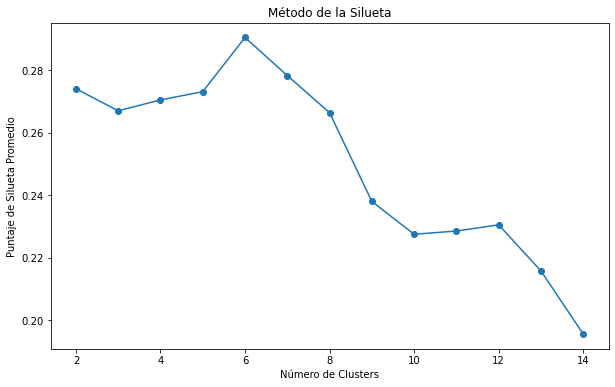

In [124]:
# Método de la Silueta
silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_combined)
    silhouette_avg = silhouette_score(X_combined, kmeans_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje de Silueta Promedio')
plt.show()

In [125]:
# Imprimir los resultados del mejor número de clusters según el método de la silueta
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'El número óptimo de clusters según el método de la silueta es: {best_k}')

El número óptimo de clusters según el método de la silueta es: 6


### Clustering con 6 Clusters

In [ ]:
# Aplicar PCA para reducir la dimensionalidad a 2 componentes (solo para visualización)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Función para visualizar clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.show()

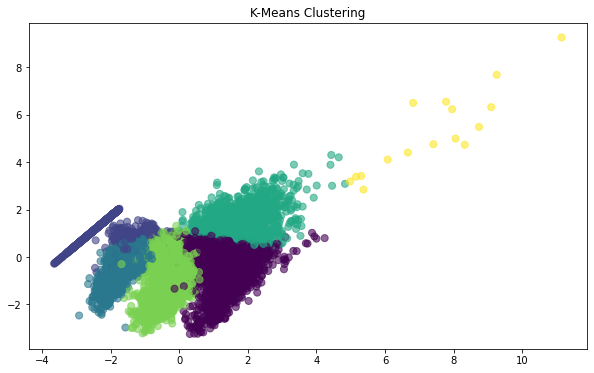

In [143]:
# K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X_combined)
plot_clusters(pca_features, kmeans_labels, 'K-Means Clustering')

C:\Users\Berta\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


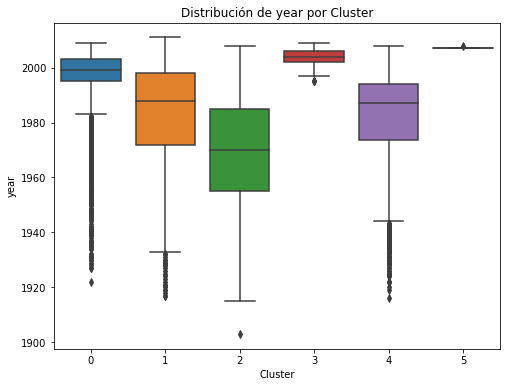

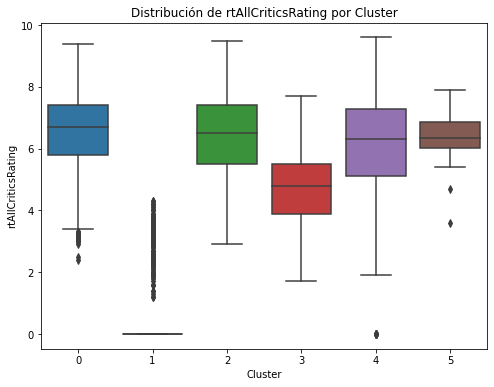

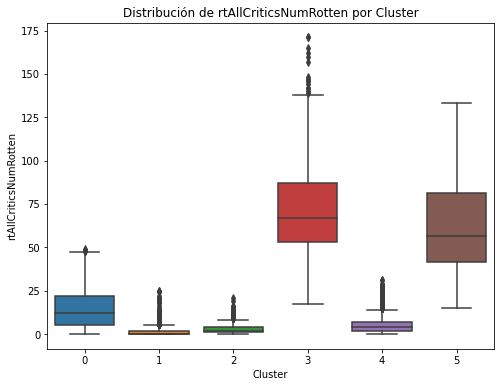

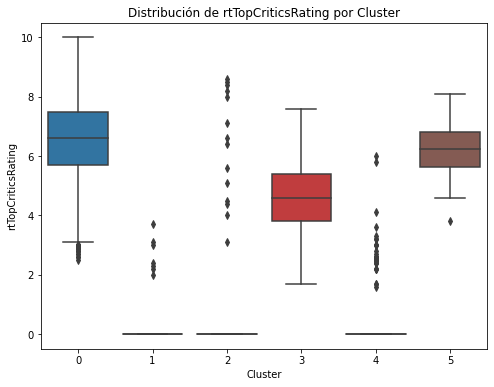

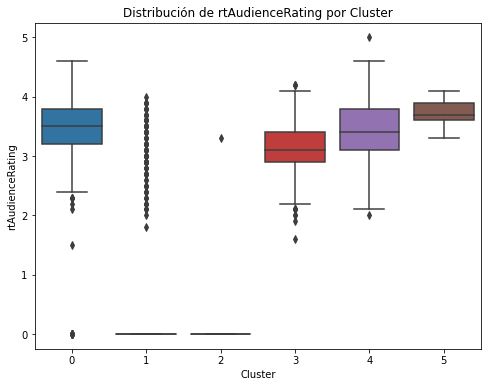

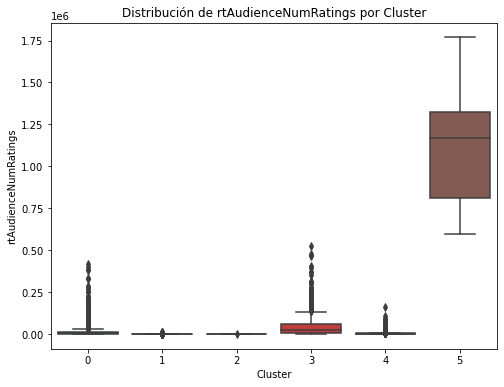

In [131]:
# Agregar las etiquetas de cluster al DataFrame
movies_2['KMeans_Cluster'] = kmeans_labels

# Iterar sobre cada característica y generar un boxplot para cada una en función del cluster
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=movies_2)
    plt.title(f'Distribución de {feature} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

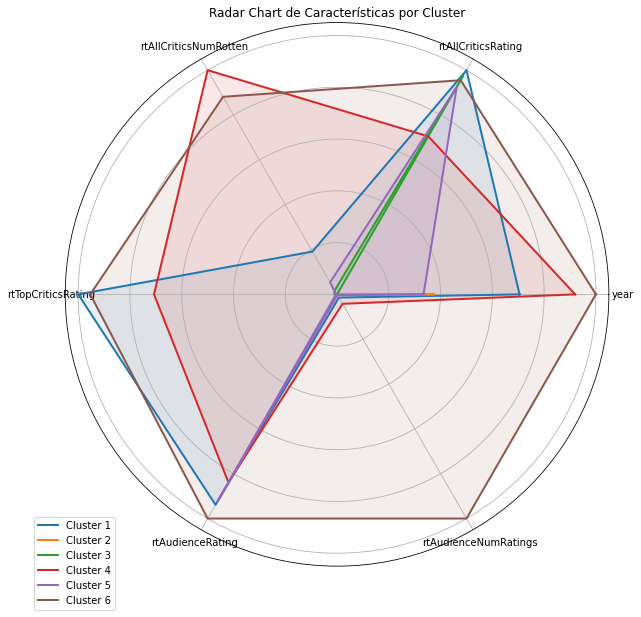

In [132]:
# Calcular los valores promedio de cada característica para cada cluster
cluster_means = movies_2.groupby(kmeans_labels)[numerical_features].mean()

# Normalizar los valores para que estén en el rango [0, 1]
cluster_means_normalized = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Definir las características y los clusters
features = cluster_means_normalized.columns
num_clusters = len(cluster_means_normalized)

# Calcular los ángulos para cada característica
angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
angles += angles[:1]

# Crear el gráfico
plt.figure(figsize=(10, 10))
for i in range(num_clusters):
    values = cluster_means_normalized.iloc[i].values.flatten().tolist()
    values += values[:1]
    ax = plt.subplot(111, polar=True)
    ax.fill(angles, values, alpha=0.1)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {i+1}')
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)
    plt.title('Radar Chart de Características por Cluster')
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

In [ ]:
# Especifica la ruta donde deseas guardar el archivo CSV
csv_file_path = "movies_export.csv"

# Exporta el DataFrame a un archivo CSV
movies.to_csv(csv_file_path, index=False)

print(f"El archivo CSV se ha guardado correctamente en {csv_file_path}.")

In [ ]:
movies_2.Cluster.value_counts()

# Recomendador

In [ ]:
# Crear una función para encontrar películas similares basadas en el ID de película seleccionado
def find_similar_movies(movie_id):
    # Obtener el cluster de la película seleccionada
    selected_movie_cluster = movies.loc[movies['MovieID'] == movie_id, 'Cluster'].values[0]
    
    # Filtrar las películas que pertenecen al mismo cluster que la película seleccionada, excluyendo la película seleccionada
    similar_movies = movies[(movies['Cluster'] == selected_movie_cluster) & (movies['MovieID'] != movie_id)]
    
    return similar_movies[['MovieID', 'Title']]

In [ ]:
# Crear un menú desplegable con los IDs de las películas
movie_ids = movies['MovieID'].tolist()
movie_dropdown = widgets.Dropdown(options=movie_ids, description='Movie ID:')

# Función interactiva para mostrar las películas similares cuando el usuario selecciona un ID de película
@interact(movie_id=movie_dropdown)
def show_similar_movies(movie_id):
    similar_movies = find_similar_movies(movie_id)
    
    if similar_movies.empty:
        print("No se encontraron películas similares.")
    else:
        print("Películas similares:")
        for index, row in similar_movies.iterrows():
            print(f"ID: {row['MovieID']}, Título: {row['Title']}")


--------